In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Imputer
# from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import roc_curve, auc
# import os
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv")

In [21]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2
195,59,1,2,150,212,1,1,157,0,1.6,2,0,2
53,49,1,2,120,188,0,1,139,0,2.0,1,3,3


In [10]:
df_train = df.iloc[:,0:-1]
df_test = df.iloc[:,-1]

In [12]:
df = df_train.copy()

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


In [16]:
df.shape

(1025, 13)

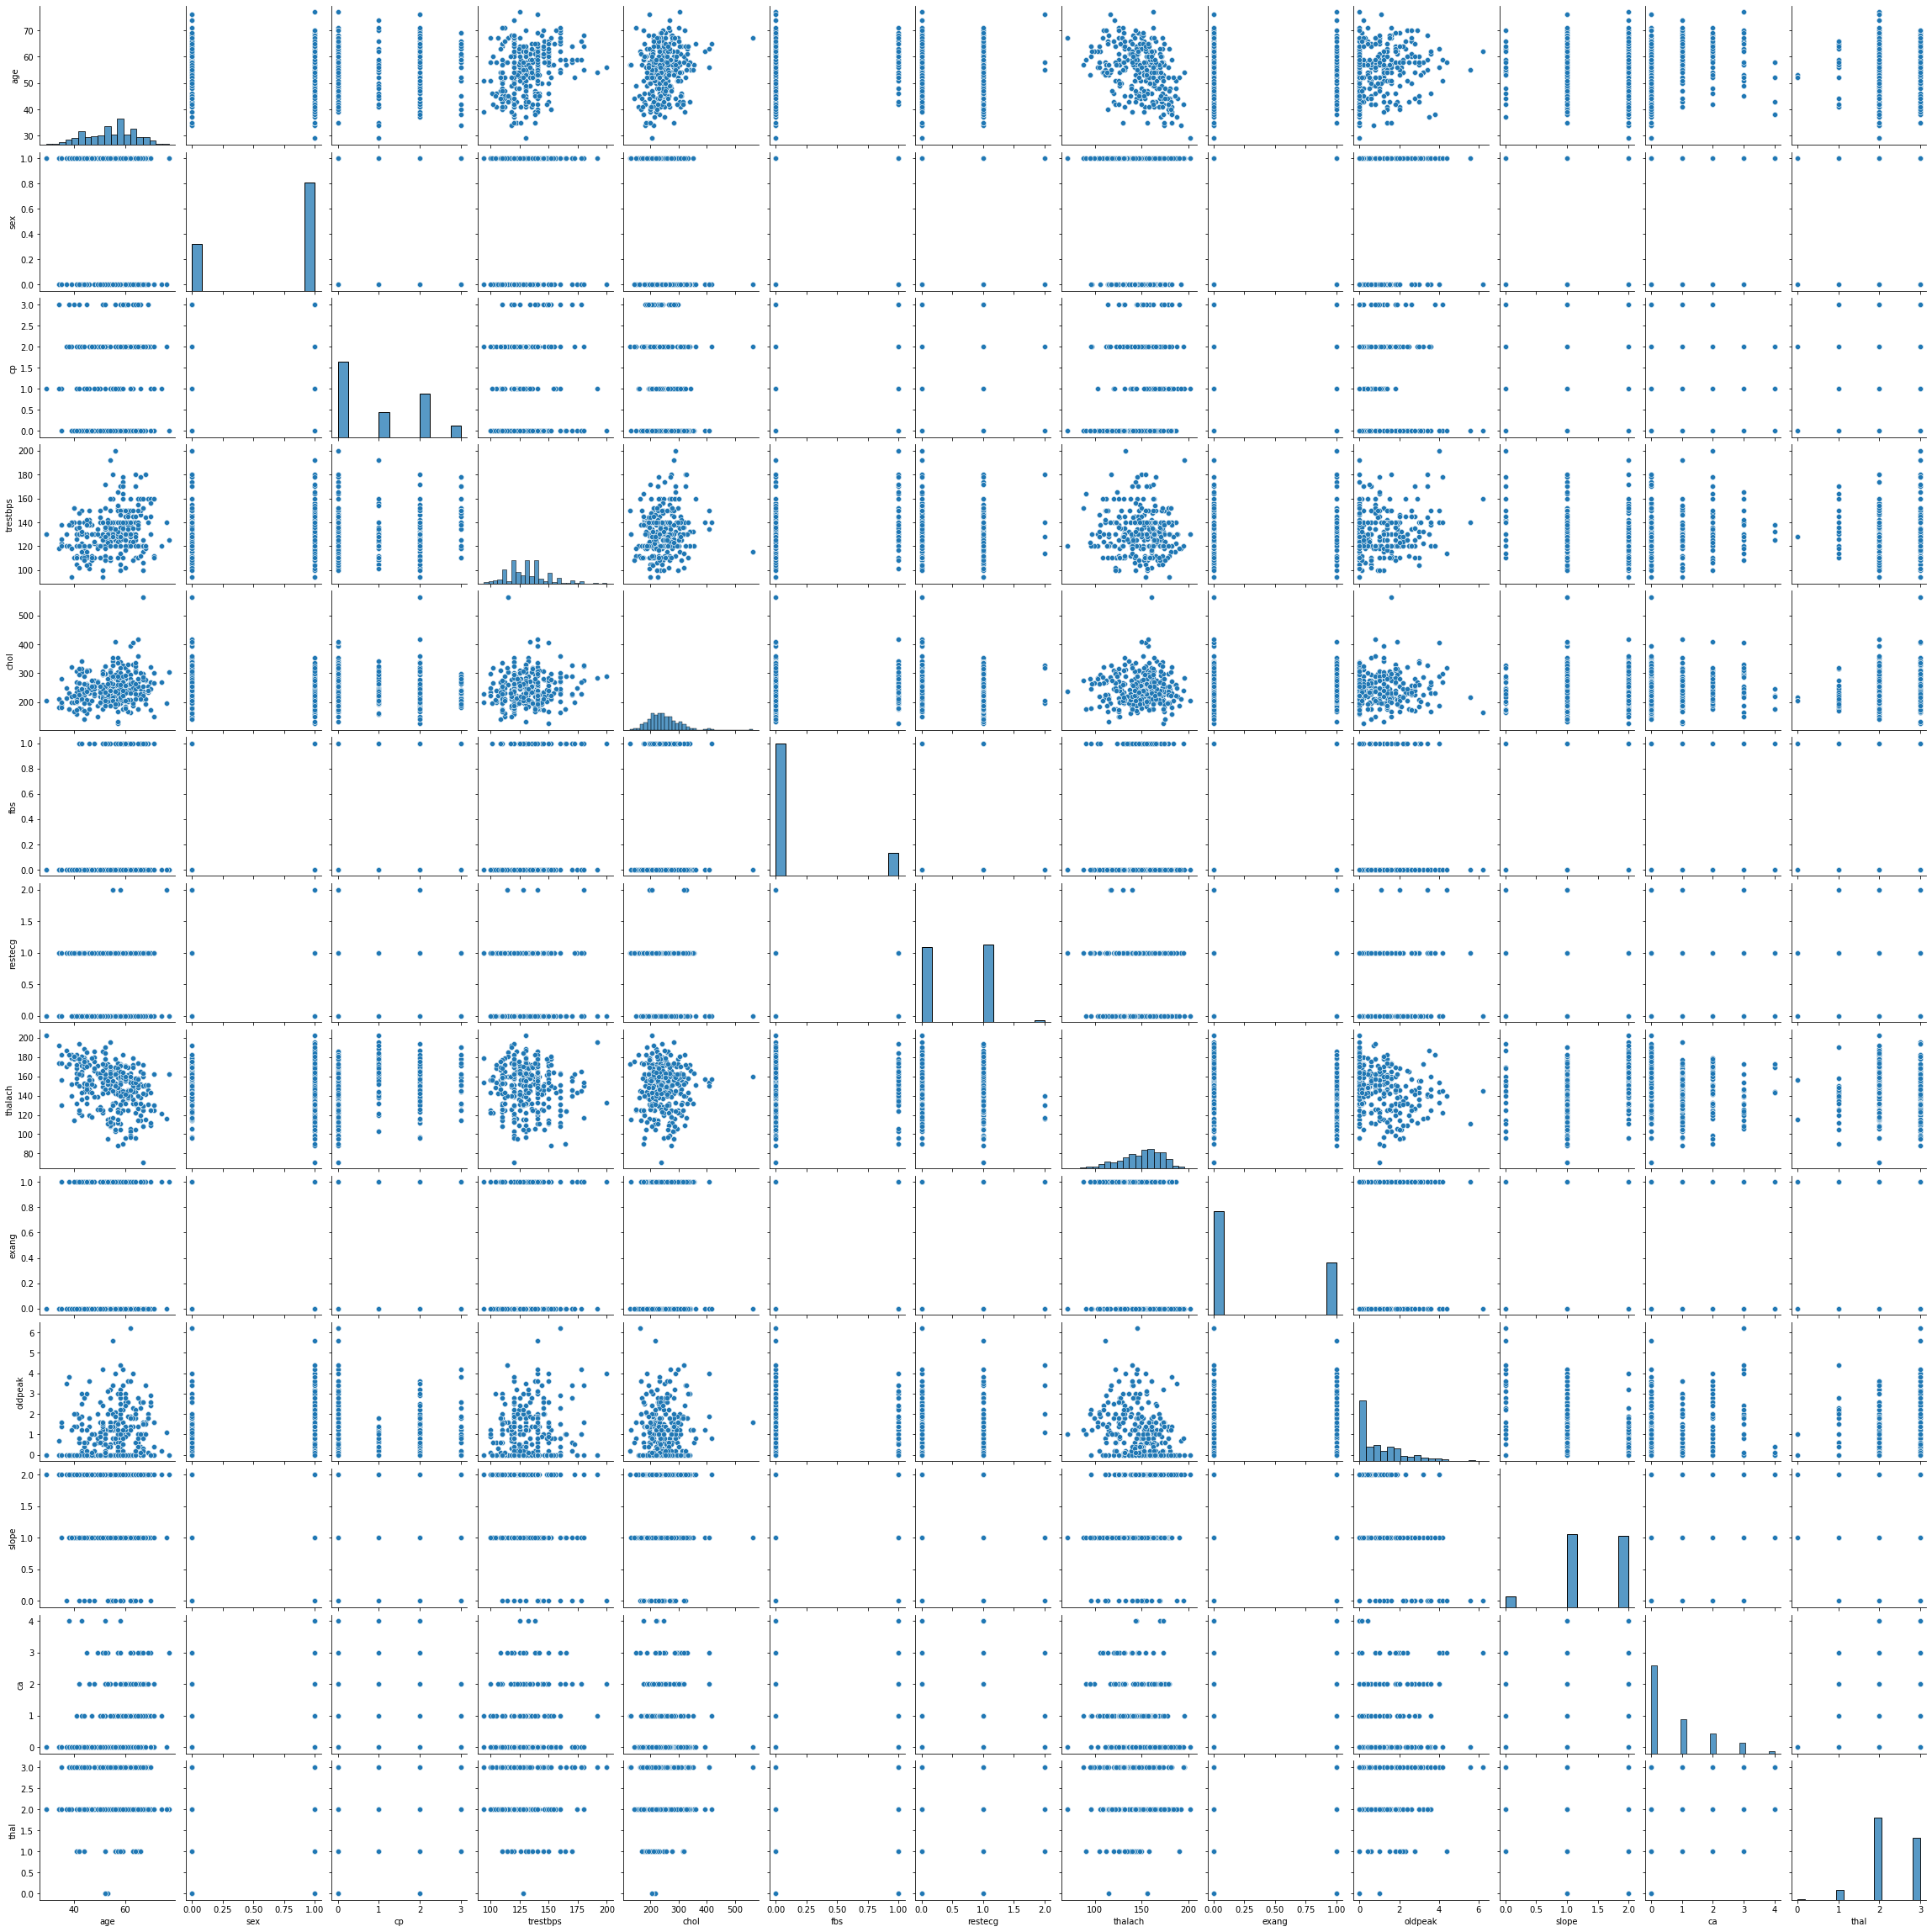

In [24]:
sns.pairplot(df)
plt.show()

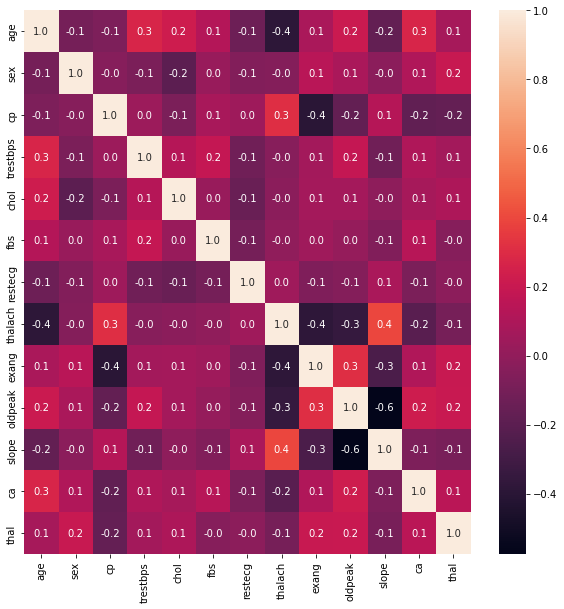

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

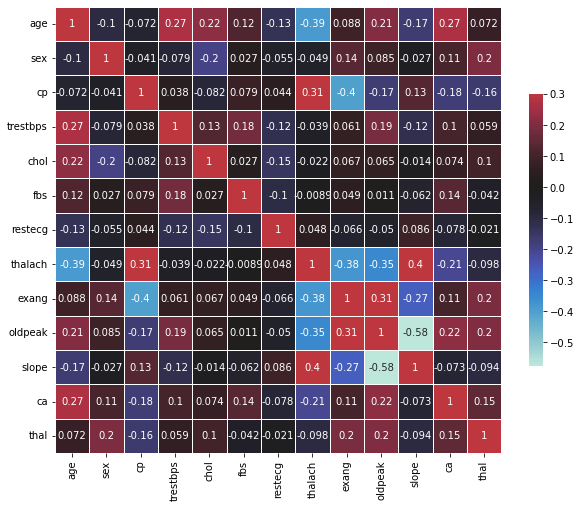

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
# plt.tight_layout()
plt.show()

In [40]:
df['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

C:\Users\Arpit Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

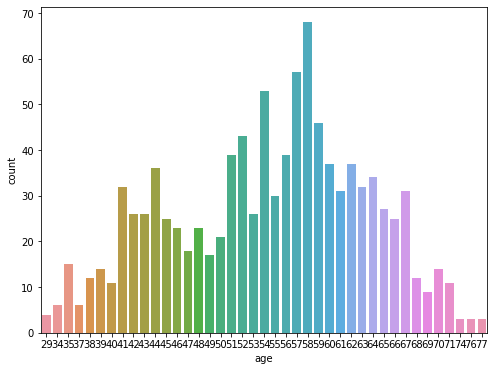

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(df['age'])

In [48]:
len(df)

1025

In [49]:
youngAge_index=df[(df.age>=29)&(df.age<40)].index

In [50]:
youngAge_index

Int64Index([ 12,  15,  52,  60,  64,  68,  83,  84, 118, 143, 149, 173, 201,
            208, 223, 242, 248, 254, 256, 258, 272, 281, 298, 330, 332, 340,
            384, 433, 457, 465, 478, 483, 501, 558, 572, 597, 627, 657, 666,
            668, 694, 695, 699, 701, 711, 779, 841, 846, 851, 871, 912, 919,
            920, 933, 970, 975, 981],
           dtype='int64')

In [59]:
df['AgeRange']=0
for index in youngAge_index:
    df.loc[index,'AgeRange']=2

In [63]:
df.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,AgeRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
